In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    d['var_est'] = result['model_params']['sigma2_est']
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

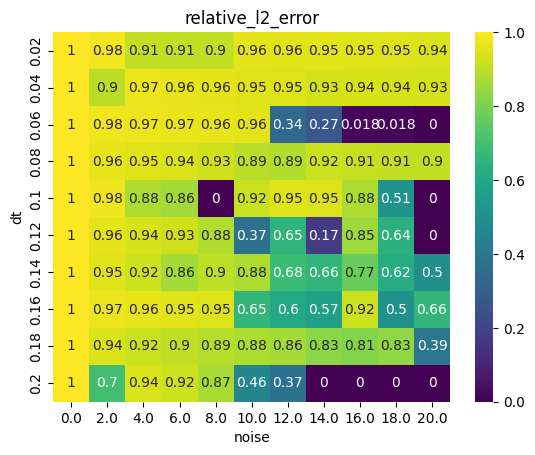

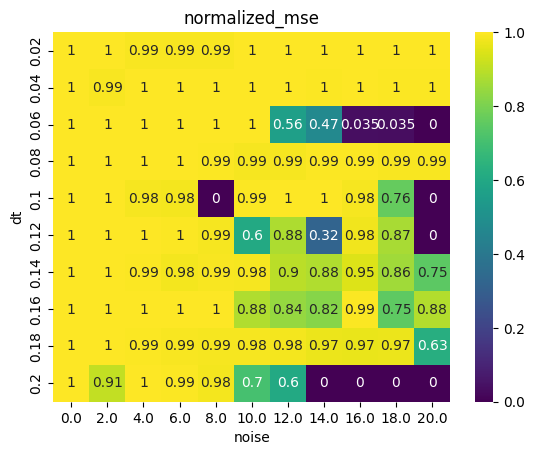

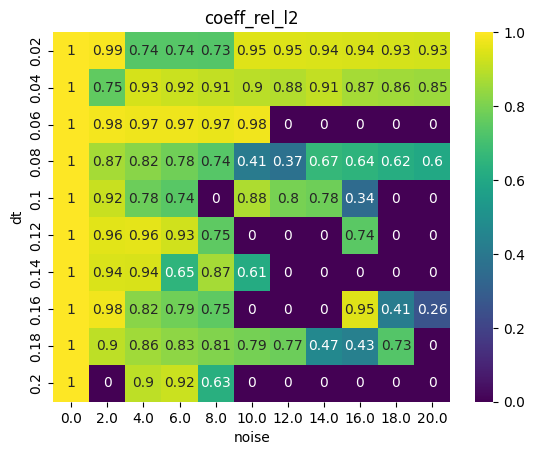

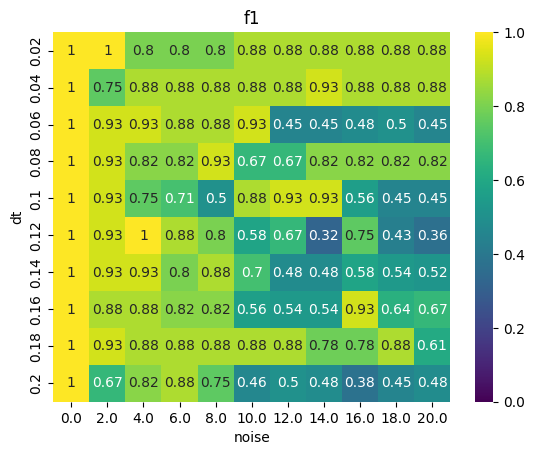

In [6]:
def heat_plot(df,metric,flip = True):
    pivot_df = df.pivot_table(index='dt', columns='noise', values=metric)
    if flip is True:
        pivot_df = 1-np.clip(pivot_df,0,1)
    sns.heatmap(pivot_df,annot=True, cmap="viridis",vmin = 0,vmax = 1)
    plt.title(metric)
    plt.show()
    
heat_plot(df,"relative_l2_error")
heat_plot(df,"normalized_mse")
heat_plot(df,"coeff_rel_l2")
heat_plot(df,"f1",flip = False)